In [142]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

df=pd.read_csv(r'C:\Users\Sandalika\Documents\deep learning workshop\cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [143]:
dataset=df.values
data=dataset[:,0:7]
target=dataset[:,7]

In [144]:
from sklearn.preprocessing import MinMaxScaler
target=np.reshape(target, (-1,1))

scaler_data=MinMaxScaler(feature_range=(0,1))
scaler_target=MinMaxScaler()

#scaler_data.fit(data)
#scaler_target.fit(target)

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [145]:
print(data_scaled[:10])

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


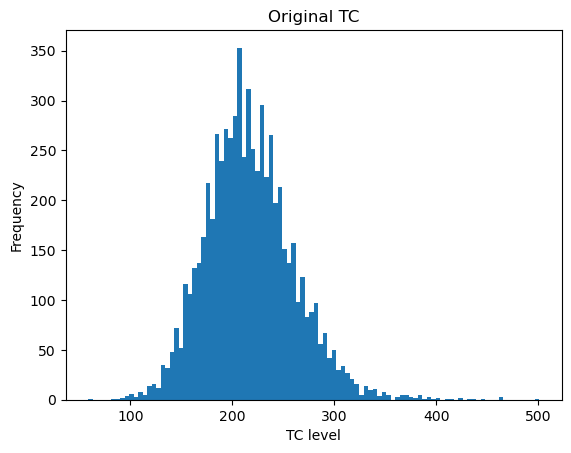

In [146]:
#dataset before scaling 
plt.hist(data[:,2],bins=100)
plt.title('Original TC')
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

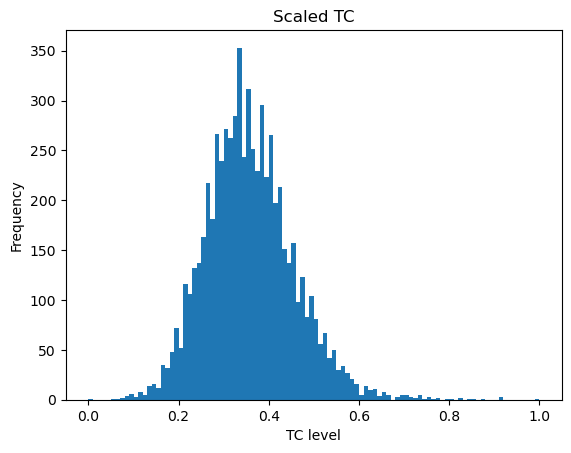

In [147]:
#dataset after scaling
plt.hist(data_scaled[:,2],bins=100)
plt.title('Scaled TC')
plt.xlabel('TC level')
plt.ylabel('Frequency')
plt.show()

In [148]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target= train_test_split(data_scaled, target_scaled, test_size=0.2)

In [149]:
#FNN architecture
from tensorflow.keras import metrics, losses
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model=Sequential()
model.add(Dense(128, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(
    optimizer='adam',
    loss=losses.MeanSquaredError(),
    metrics=[metrics.MeanSquaredError(), metrics.MeanAbsoluteError()]
)
model.summary()

C:\Users\Sandalika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,941 (38.83 KB)

 Trainable params: 9,941 (38.83 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
from keras.callbacks import ModelCheckpoint
checkpoint =ModelCheckpoint('models/model-{epoch:03d}.keras', monitor='val_loss',save_best_only=True, mode='auto')

In [151]:
history=model.fit(train_data, train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint])

Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.1302 - mean_squared_error: 0.0346 - val_loss: 0.0096 - val_mean_absolute_error: 0.0603 - val_mean_squared_error: 0.0096
Epoch 2/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0706 - mean_squared_error: 0.0109 - val_loss: 0.0085 - val_mean_absolute_error: 0.0561 - val_mean_squared_error: 0.0085
Epoch 3/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0615 - mean_squared_error: 0.0084 - val_loss: 0.0086 - val_mean_absolute_error: 0.0548 - val_mean_squared_error: 0.0086
Epoch 4/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0559 - mean_squared_error: 0.0072 - val_loss: 0.0059 - val_mean_absolute_error: 0.0455 - val_mean_squared_error: 0.0059
Epoch 5/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067 - mean_absolute_error: 0.0533 - mean_squared_error: 0.0067 - val_loss: 0.0069 - 

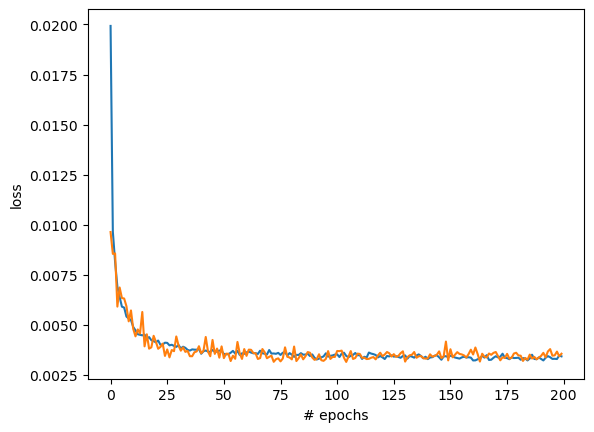

In [152]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [153]:
from sklearn.metrics import r2_score
predicted_result=model.predict(test_data)
r2=r2_score(test_target, predicted_result)
print('r2 score:',r2)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
r2 score: 0.8566973187921242


In [154]:
# After training
model.save('models/final_model.h5')

In [184]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.4.1


In [155]:
print('actual:', test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.39390387 0.02813599 0.17350528 0.01992966 0.03282532 0.02227433
  0.02696366 0.15474795 0.12543962 0.77842907]]
predicted: [[0.34975255 0.04486356 0.28693786 0.040802   0.0969601  0.04886343
  0.03585155 0.18867806 0.13880195 0.3716845 ]]


In [156]:
print('actual inverse scaled:', scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:', scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[33.7  2.5 14.9  1.8  2.9  2.   2.4 13.3 10.8 66.5]]
predicted inverse scaled: [[29.933891   3.9268618 24.5758     3.5804105  8.370696   4.26805
   3.1581368 16.194239  11.939806  31.804688 ]]


In [157]:
import joblib
joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']